<a href="https://colab.research.google.com/github/KNVIDYASHREE/Powerbi-desktop/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


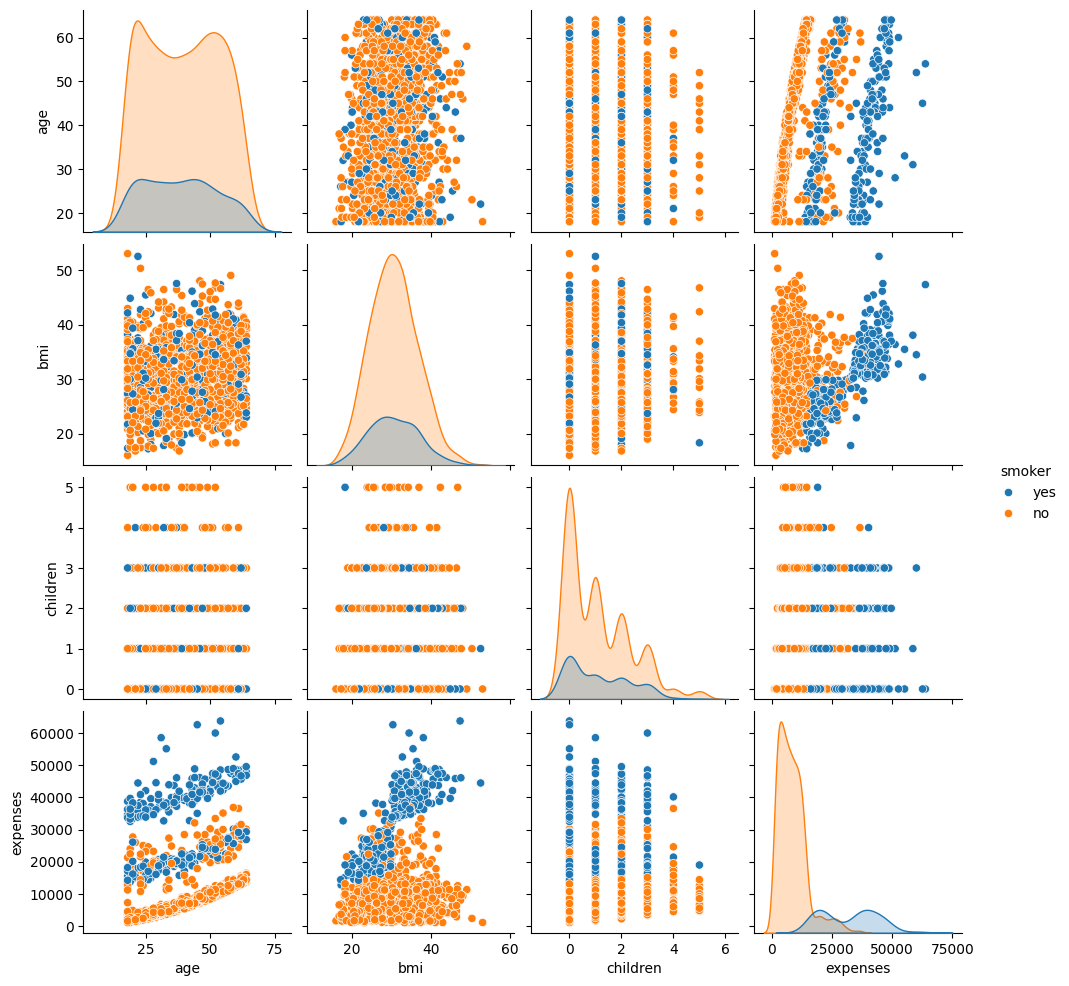

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/insurance.csv')
print(df.head())
print(df.info())
sns.pairplot(df, hue='smoker')

In [5]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('expenses', axis=1)
y = df_encoded['expenses']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 4181.561524000792
R² Score: 0.7835726930039906


In [10]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.4 MB/s eta 0:00:00


In [12]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [14]:
# Save this as app.py
import streamlit as st
import numpy as np
import pickle

# Load model
model = pickle.load(open('model.pkl', 'rb'))

st.title("Medical Cost Predictor")

age = st.slider("Age", 18, 65)
bmi = st.slider("BMI", 15.0, 40.0)
children = st.slider("Children", 0, 5)
smoker = st.selectbox("Smoker", ["Yes", "No"])
sex = st.selectbox("Sex", ["Male", "Female"])
region = st.selectbox("Region", ["northeast", "northwest", "southeast", "southwest"])

# Convert inputs to model format
input_data = pd.DataFrame({
    'age': [age],
    'bmi': [bmi],
    'children': [children],
    'sex_male': [1 if sex == "Male" else 0],
    'smoker_yes': [1 if smoker == "Yes" else 0],
    'region_northwest': [1 if region == "northwest" else 0],
    'region_southeast': [1 if region == "southeast" else 0],
    'region_southwest': [1 if region == "southwest" else 0]
})

# Predict
prediction = model.predict(input_data)
st.write(f"Estimated Medical Cost: ₹{prediction[0]:,.2f}")

2025-09-03 07:16:16.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 07:16:16.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar